## Third Assignment
João Victor Palhares Barbosa - 173664

#### Below are all the libraries used

In [1]:
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
from numpy import var, mean, sqrt
from pandas import Series

#### Report the p-value of the comparison between the blood pressure of diabetic and non-diabetic people.
#### - (diabetic is type = Yes).
#### - bp.csv dataset

In [2]:
df_bp = pd.read_csv("bp.csv")
df_bp

,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No
...,...,...
195,58,No
196,68,Yes
197,70,No
198,58,No


In [3]:
diabetic_group_yes = df_bp[df_bp['type'] == 'Yes']
diabetic_group_no = df_bp[df_bp['type'] == 'No']

#### Independent Two Sample t-Test

In [4]:
ttest_ind(diabetic_group_yes['bp'], diabetic_group_no['bp'])

Ttest_indResult(statistic=3.001495202122035, pvalue=0.0030323591864622732)

#### Since the p-value is less than .05, we reject the null hypothesis of the t-test and conclude that there is sufficient evidence to say that the two methods lead to different mean exam scores.

#### Welch’s Two Sample t-Test

In [5]:
ttest_ind(diabetic_group_yes['bp'], diabetic_group_no['bp'], equal_var=False)

Ttest_indResult(statistic=2.959197369239023, pvalue=0.0036648836652941204)

#### Since the p-value is less than .05, we reject the null hypothesis of the t-test and conclude that there is sufficient evidence to say that the two methods lead to different mean exam scores.

# Wilcoxon signed rank
Suppose, there are two plant genotypes (A and B) differing in their yield phenotype. Mann-Whitney U test is appropriate to compare the yield of two genotypes under the assumption that yield output does not follow the normal distribution.

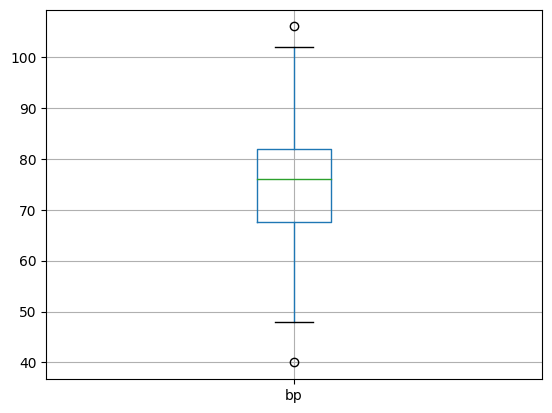

In [6]:
diabetic_group_yes.boxplot(column=['bp'])
plt.show()

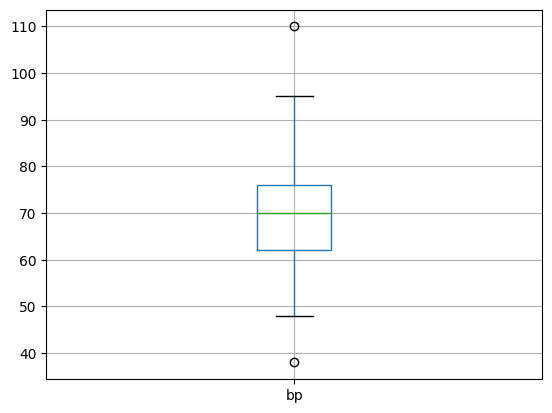

In [7]:
diabetic_group_no.boxplot(column=['bp'])
plt.show()

In [8]:
w, pvalue = stats.shapiro(diabetic_group_yes['bp'])
w, pvalue

(0.9802485108375549, 0.3545365631580353)

In [9]:
w, pvalue = stats.shapiro(diabetic_group_no['bp'])
w, pvalue

(0.9897610545158386, 0.44096317887306213)

# Check data distribution

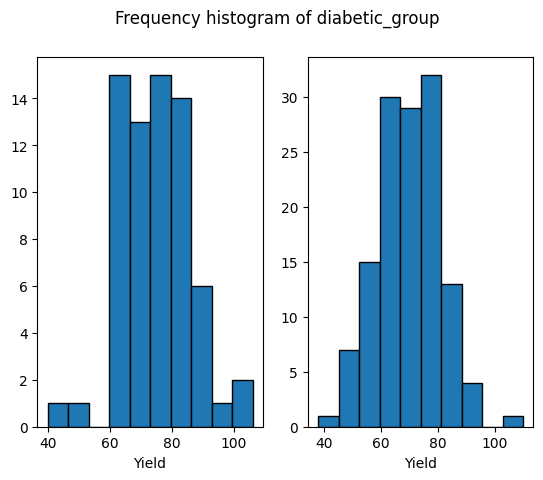

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram of diabetic_group')
ax1.hist(diabetic_group_yes['bp'], bins=10, histtype='bar', ec='k')
ax2.hist(diabetic_group_no['bp'], bins=10, histtype='bar', ec='k')
ax1.set_xlabel("Yield")
ax2.set_xlabel("Yield")
plt.show()

# Perform Mann-Whitney U test

In [11]:
stats.mannwhitneyu(x=diabetic_group_yes['bp'], y=diabetic_group_no['bp'], alternative = 'two-sided')

MannwhitneyuResult(statistic=5669.0, pvalue=0.0022943751600507183)

In [12]:
stats.mannwhitneyu(x=diabetic_group_yes['bp'], y=diabetic_group_no['bp'], alternative='greater')

MannwhitneyuResult(statistic=5669.0, pvalue=0.0011471875800253592)

 #### Let’s plot the data as a q-q plot to view the data differently. It is easier to see if there are any deviations from normality when the data is plotted as a q-q plot.

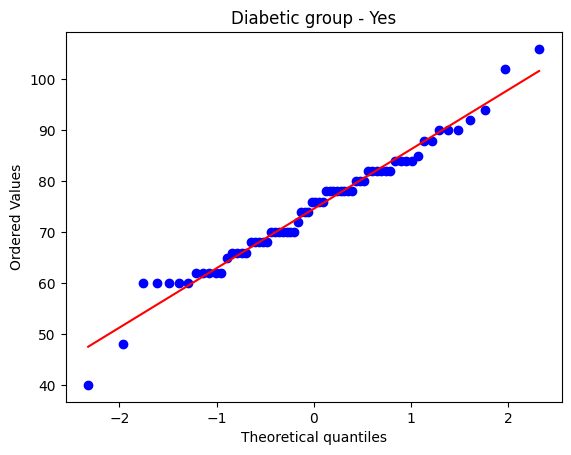

In [13]:
stats.probplot(diabetic_group_yes['bp'], dist="norm", plot=plt)
plt.title("Diabetic group - Yes")
plt.show()

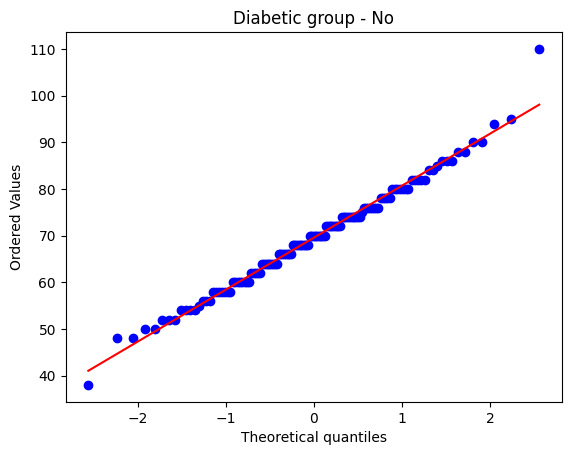

In [14]:
stats.probplot(diabetic_group_no['bp'], dist="norm", plot=plt)
plt.title("Diabetic group - No")
plt.show()

#### - paired.csv dataset

In [15]:
df_paired = pd.read_csv("paired.csv")
df_paired

,Clone,August,November
0,Balsam_Spire,8.1,11.2
1,Beaupre,10.0,16.3
2,Hazendans,16.5,15.3
3,Hoogvorst,13.6,15.6
4,Raspalje,9.5,10.5
5,Unal,8.3,15.5
6,Columbia_River,18.3,12.7
7,Fritzi_Pauley,13.3,11.1
8,Trichobel,7.9,19.9
9,Gaver,8.1,20.4


In [16]:
paired_august = []
paired_november = []
for x in df_paired.August:
    paired_august.append(x)

for y in df_paired.November:
    paired_november.append(y)

df_paired_august = pd.DataFrame(paired_august, columns=['august'])
df_paired_november = pd.DataFrame(paired_november, columns=['november'])

In [17]:
stats.ttest_rel(paired_august, paired_november)

Ttest_relResult(statistic=-2.3088956550760438, pvalue=0.03955525086687241)

The paired samples t-test follows the null and alternative hypotheses:

H0: It signifies that the mean pre-test and post-test scores are equal
HA: It signifies that the mean pre-test and post-test scores are not equal

As the p-value comes out to be equal to 0.039 which is less than 0.05 hence we reject the null hypothesis. So, we have enough proof to claim that the true mean test score is different for months before and after applying the different clones.

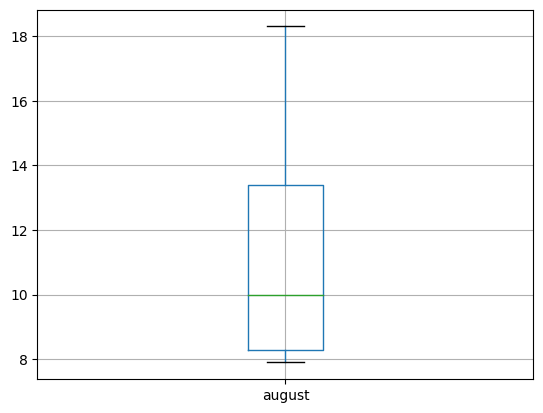

In [18]:
df_paired_august.boxplot(column=['august'])
plt.show()

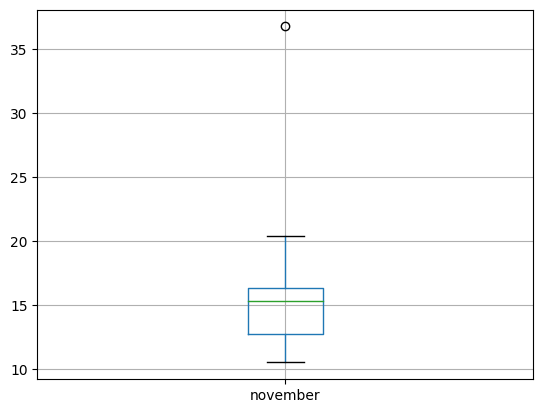

In [19]:
df_paired_november.boxplot(column=['november'])
plt.show()

In [20]:
# August paired mean
august_paired_mean = np.mean(df_paired_august, axis=0)
august_paired_mean

august    11.423077
dtype: float64

In [21]:
# August standard deviation
august_standard_deviation = np.std(df_paired_august)
august_standard_deviation

august    3.316197
dtype: float64

In [22]:
# November paired mean
november_paired_mean = np.mean(df_paired_november, axis=0)
november_paired_mean

november    16.323077
dtype: float64

In [23]:
# November standard deviation
november_standard_deviation = np.std(df_paired_november)
november_standard_deviation

november    6.61678
dtype: float64

In [24]:
weight_sample_august = np.random.choice(paired_august, size = 10)
weight_sample_august

array([10. ,  9.5,  8.3, 13.4, 18.3,  9.5, 18.3,  8.1,  7.9, 18.3])

In [25]:
weight_sample_november = np.random.choice(paired_november, size = 10)
weight_sample_november


array([20.4, 20.4, 14.2, 20.4, 20.4, 16.3, 15.3, 15.3, 16.3, 19.9])

In [26]:
boot_means_august = []
for _ in range(10000):
    boot_sample_august = np.random.choice(weight_sample_august, replace = True, size = 10) # take a random sample each iteration
    boot_mean_august = np.mean(boot_sample_august)# calculate the mean for each iteration
    boot_means_august.append(boot_mean_august) # append the mean to boot_means
boot_means_np_august = np.array(boot_means_august) # transform it into a numpy array for calculation

boot_means_np_august

array([12.99, 11.58, 11.79, ..., 12.43, 12.79, 12.23])

In [27]:
boot_means_august = np.mean(boot_means_np_august)# bootstrapped sample means

np.mean(weight_sample_august)# recall: true population mean

boot_std_august = np.std(boot_means_np_august) # bootstrapped std

np.percentile(boot_means_np_august, [10.12, 9.29])

array([10.45, 10.38])

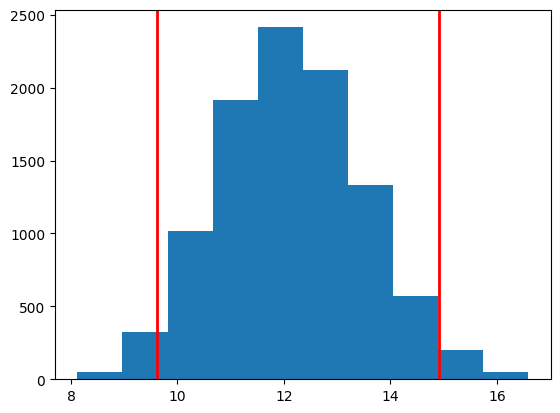

In [28]:
plt.hist(boot_means_np_august, alpha = 1)
plt.axvline(np.percentile(boot_means_np_august, 2.5), color = 'red', linewidth=2)
plt.axvline(np.percentile(boot_means_np_august, 97.5), color = 'red', linewidth=2)
plt.show()

In [29]:
boot_means_november = []
for _ in range(10000):
    boot_sample_november = np.random.choice(weight_sample_november, replace = True, size = 10) # take a random sample each iteration
    boot_mean_november = np.mean(boot_sample_november)# calculate the mean for each iteration
    boot_means_november.append(boot_mean_november) # append the mean to boot_means
boot_means_np_november = np.array(boot_means_november) # transform it into a numpy array for calculation

boot_means_np_november

array([18.82, 18.2 , 18.76, ..., 18.81, 16.87, 17.84])

In [30]:
boot_means_november = np.mean(boot_means_np_november)# bootstrapped sample means

np.mean(weight_sample_november)# recall: true population mean

boot_std_november = np.std(boot_means_np_november) # bootstrapped std

np.percentile(boot_means_np_november, [15.68, 18.29])

array([17.07, 17.17])

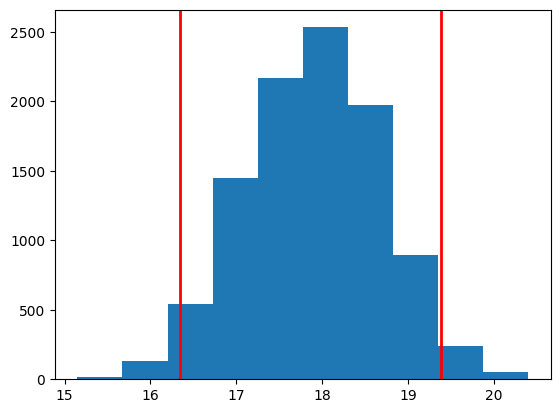

In [31]:
plt.hist(boot_means_np_november, alpha = 1)
plt.axvline(np.percentile(boot_means_np_november, 2.5), color = 'red', linewidth=2)
plt.axvline(np.percentile(boot_means_np_november, 97.5), color = 'red', linewidth=2)
plt.show()

In [32]:
def cohend(d1: Series, d2: Series) -> float:

    # calculate the size of samples
    n1, n2 = len(d1), len(d2)

    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)

    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)

    # return the effect size
    return (u1 - u2) / s


In [33]:
cohend(paired_august, paired_november)

-0.8995457019130951